# "Performance Analysis of T20 Cricket World Cup Players: Balancing Batting Average and Strike Rate"

## The T20 Cricket World Cup for men is one of the most eagerly anticipated events in the cricketing world. 
## To gain insights into the performance of players in this prestigious tournament,we embark on a data analysis project. 
## Our goal is to scrape data from ESPNcricinfo for all eight participating teams and 
## identify players who not only maintain a good batting average but also exhibit an impressive strike rate.

In [1]:
## Importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup

%matplotlib inline

Data Source: Our primary data source is ESPNcricinfo, a trusted cricket statistics and news platform.

Web Scraping: We will utilize web scraping techniques to extract valuable data from ESPNcricinfo's T20 Cricket World Cup pages. Specifically, we will focus on data related to batting averages and strike rates for players representing the eight participating teams.

Team Selection: We will compile data for each of the eight teams participating in the T20 World Cup, namely, [India,Pakistan,Srilank,Bangladesh,England,West-indies,SouthAfrica,Australia].

Data Collection: We will scrape player-specific data, including batting average and strike rate, for all players in the selected teams. This data will be stored in a structured format for further analysis.

In [2]:
data = []
for i in range(1,9):
    link="https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team="+str(i)+";type=trophy"
    print(link)
    responses = requests.get(link)
    dfs = pd.read_html(responses.text)
    data.append(dfs[0])


https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=1;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=2;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=3;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=4;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=5;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=6;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=7;type=trophy
https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=89;team=8;type=trophy


In [3]:
len(data)

8

# Data covert into Dataframe from

In [4]:
df = pd.DataFrame(data=data[0])

In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,MM Ali,2014-2022,22,17,6,254,51*,23.09,124.50,-,1,2
1,JM Anderson,2007-2009,9,2,1,-,0*,0.00,0.00,-,-,1
2,JM Bairstow,2012-2021,11,11,3,85,18,10.62,96.59,-,-,1
3,SW Billings,2021-2021,1,-,0,-,-,-,0.00,-,-,-
4,RS Bopara,2009-2014,11,11,2,239,55,26.55,114.90,-,1,-


In [6]:
data = pd.concat([df,data[1],data[2],data[3],data[4],data[5],data[6],data[7]],axis=0)

In [7]:
## Read the first five rows of the dataset

data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,MM Ali,2014-2022,22,17,6,254,51*,23.09,124.50,-,1,2
1,JM Anderson,2007-2009,9,2,1,-,0*,0.00,0.00,-,-,1
2,JM Bairstow,2012-2021,11,11,3,85,18,10.62,96.59,-,-,1
3,SW Billings,2021-2021,1,-,0,-,-,-,0.00,-,-,-
4,RS Bopara,2009-2014,11,11,2,239,55,26.55,114.90,-,1,-


# Exploratory Data Analysis (EDA):

In [8]:
## Here, we replace '-' into 0 from all the columns of the dataset

data.replace(to_replace='-' ,value = 0 , inplace = True)

In [9]:
## Here , we check the unique_value of the 'HS' column from the dataset

data['HS'].unique()

array(['51*', '0*', '18', 0, '55', '23*', '10*', '20', '101*', '37', '6*',
       '12', '8*', '31', '14*', '116*', '16', '63', '2*', '29*', '33',
       '50', '41', '25*', '71*', '1', '67', '79', '4', '32', '9*', '83',
       '78', '10', '38', '7', '43', '52*', '34', '22', '21', '1*', '99*',
       '4*', '27', '15*', '13', '71', '45', '3', '42', '73*', '36', '59',
       '60*', '28*', '58', '15', '77*', '74', '61*', '59*', '0', '41*',
       '89*', '81', '85*', '46', '31*', '8', '19', '79*', '86*', '65',
       '90*', '39', '73', '50*', '6', '16*', '32*', '19*', '109', '5',
       '94*', '28', '13*', '34*', '66*', '84', '84*', '117', '81*', '62*',
       '56', '14', '7*', '44', '43*', '42*', '82*', '72', '51', '92*',
       '25', '93', '123', '26*', '57', '72*', '35*', '35', '104', '21*',
       '85', '30', '75', '17', '9', '5*', '33*', '40', '69', '101', '68',
       '48', '70', '29', '111*', '27*', '55*', '2', '11', '64', '12*',
       '11*', '52', '54*', '47', '94', '3*', '80*', '96

In [10]:
## Here , we replace asteric value from 'Hs' columns

data['HS'].replace({'\*':''},regex = True,inplace = True)

In [11]:
## Here , we check the unique_value of the 'HS' column from the dataset

data['HS'].unique()

array(['51', '0', '18', 0, '55', '23', '10', '20', '101', '37', '6', '12',
       '8', '31', '14', '116', '16', '63', '2', '29', '33', '50', '41',
       '25', '71', '1', '67', '79', '4', '32', '9', '83', '78', '38', '7',
       '43', '52', '34', '22', '21', '99', '27', '15', '13', '45', '3',
       '42', '73', '36', '59', '60', '28', '58', '77', '74', '61', '89',
       '81', '85', '46', '19', '86', '65', '90', '39', '109', '5', '94',
       '66', '84', '117', '62', '56', '44', '82', '72', '92', '93', '123',
       '26', '57', '35', '104', '30', '75', '17', '40', '69', '68', '48',
       '70', '111', '11', '64', '54', '47', '80', '96', '88', '100', '53'],
      dtype=object)

In [12]:
## Here , we check info the all columns from dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 52
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  385 non-null    object 
 1   Span    385 non-null    object 
 2   Mat     385 non-null    int64  
 3   Inns    385 non-null    object 
 4   NO      385 non-null    int64  
 5   Runs    385 non-null    object 
 6   HS      385 non-null    object 
 7   Ave     385 non-null    object 
 8   SR      385 non-null    float64
 9   100     385 non-null    object 
 10  50      385 non-null    object 
 11  0       385 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 39.1+ KB


In [14]:
## Here, we change columns  datatypes with suitable datatypes

data['NO'] = data['NO'].astype(int)
data['Inns'] = data['Inns'].astype(int)
data['Runs'] = data['Runs'].astype(int)
data['HS'] = data['HS'].astype(int)
data['Ave'] = data['Ave'].astype(float)
data['SR'] = data['SR'].astype(float)
data['100']  = data['100'].astype(int)
data['50'] = data['50'].astype(int)
data['0'] = data['0'].astype(int)

In [15]:
## Here, We check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 52
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  385 non-null    object 
 1   Span    385 non-null    object 
 2   Mat     385 non-null    int64  
 3   Inns    385 non-null    int32  
 4   NO      385 non-null    int32  
 5   Runs    385 non-null    int32  
 6   HS      385 non-null    int32  
 7   Ave     385 non-null    float64
 8   SR      385 non-null    float64
 9   100     385 non-null    int32  
 10  50      385 non-null    int32  
 11  0       385 non-null    int32  
dtypes: float64(2), int32(7), int64(1), object(2)
memory usage: 28.6+ KB


In [16]:
## Here , we check statistical values of the columns from the  dataset.

data.describe()

,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,9.914286,6.802597,1.607792,125.446753,29.449351,15.070000,98.621610,0.025974,0.623377,0.503896
std,8.144235,7.478963,1.994639,192.476089,30.122720,15.266436,58.260743,0.174853,1.452718,0.848166
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,0.000000,4.000000,3.000000,1.000000,68.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1.000000,37.000000,18.000000,12.330000,110.680000,0.000000,0.000000,0.000000
75%,14.000000,10.000000,2.000000,163.000000,50.000000,24.110000,130.990000,0.000000,1.000000,1.000000
max,39.000000,36.000000,14.000000,1141.000000,123.000000,88.330000,400.000000,2.000000,14.000000,5.000000


In [17]:
## Here,we made different dataset('df') from selecting the columns of previous dataset. 

df = data[['Player','Mat','Inns','NO','Runs','HS','Ave','SR']]

In [18]:
## Here,we View the first-five rows of the dataset(df).

df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,SR
0,MM Ali,22,17,6,254,51,23.09,124.50
1,JM Anderson,9,2,1,0,0,0.00,0.00
2,JM Bairstow,11,11,3,85,18,10.62,96.59
3,SW Billings,1,0,0,0,0,0.00,0.00
4,RS Bopara,11,11,2,239,55,26.55,114.90


In [19]:
## Here,we check the statistical vlaues from the dataset('df') 

df.describe()

,Mat,Inns,NO,Runs,HS,Ave,SR
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,9.914286,6.802597,1.607792,125.446753,29.449351,15.070000,98.621610
std,8.144235,7.478963,1.994639,192.476089,30.122720,15.266436,58.260743
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,0.000000,4.000000,3.000000,1.000000,68.000000
50%,7.000000,4.000000,1.000000,37.000000,18.000000,12.330000,110.680000
75%,14.000000,10.000000,2.000000,163.000000,50.000000,24.110000,130.990000
max,39.000000,36.000000,14.000000,1141.000000,123.000000,88.330000,400.000000


In [20]:
## Here,we check the unique_value of the columns ('Runs') from the dataset(df)

df['Runs'].unique()

array([ 254,    0,   85,  239,   81,   36,   56,  799,  210,   12,   14,
          9,   70,   37,  568,   10,  261,    2,  101,  194,  113,  172,
         61,  552,    1,   67,  580,    4,   69,   15,  249,  306,   24,
        209,    7,  166,   58,    8,   22,   41,  439,   29,  119,  108,
         46,   26,   30,  458,  169,    3,  178,  265,  132,  234,  437,
        143,   33,  321,  446,   18,   86,  190,  206,  107,  103,  806,
        537,  258,  376,  161,   49,  153,  410,  717,  271,   17,  433,
        173,   62,   13,  308,   16,    5,   45,   42,  141,  352,   31,
        177,   11,   28,   57,  530,  186,  316,   48,  219,  965,  127,
         66,   79,  147,   34,  128,   39,   80,  158,  215,  163,  339,
        157,   25,   21,   95,  274,   50,  134,   77,  617,  637,  102,
        317,  125,  146,  105,  189,  117,  124,   65,    6,  233,  562,
        699,   54,   74,  529,  524,   63,   71, 1141,  213,   87,  122,
         94,  322,  453,  187,  963,   20,  281,  5

In [21]:
## Here, we filter the data from dataset(df)

filter_df = df[df['Runs'] > 15]          

In [22]:
## Here , We view first five rows of the dataset(df)

filter_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,SR
0,MM Ali,22,17,6,254,51,23.09,124.50
2,JM Bairstow,11,11,3,85,18,10.62,96.59
4,RS Bopara,11,11,2,239,55,26.55,114.90
5,TT Bresnan,13,8,4,81,23,20.25,144.64
7,SCJ Broad,26,11,5,36,10,6.00,124.13


In [23]:
## Here,we reset the index of filter_df dataset.

filter_df.reset_index(drop=True,inplace=True)

In [24]:
## Here,View the dataset(filter_df)

filter_df

,Player,Mat,Inns,NO,Runs,HS,Ave,SR
0,MM Ali,22,17,6,254,51,23.09,124.50
1,JM Bairstow,11,11,3,85,18,10.62,96.59
2,RS Bopara,11,11,2,239,55,26.55,114.90
3,TT Bresnan,13,8,4,81,23,20.25,144.64
4,SCJ Broad,26,11,5,36,10,6.00,124.13
...,...,...,...,...,...,...,...,...
225,TAM Siriwardana,4,3,0,22,15,7.33,110.00
226,WU Tharanga,5,5,0,74,37,14.80,123.33
227,M Theekshana,15,5,3,20,11,10.00,105.26
228,HDRL Thirimanne,14,11,1,112,44,11.20,100.90


In [25]:
## Here, We check the statistical of the filter_df dataset.

filter_df.describe()

,Mat,Inns,NO,Runs,HS,Ave,SR
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,12.891304,10.404348,2.217391,207.534783,47.382609,23.926304,124.290435
std,8.529497,7.769438,2.286404,212.836892,26.679918,13.731958,27.718473
min,1.000000,1.000000,0.000000,16.000000,8.000000,0.000000,60.000000
25%,6.000000,5.000000,1.000000,57.250000,26.000000,14.910000,110.012500
50%,11.000000,8.000000,2.000000,128.500000,43.000000,22.165000,122.360000
75%,17.000000,14.000000,3.000000,273.250000,67.750000,29.802500,136.465000
max,39.000000,36.000000,14.000000,1141.000000,123.000000,88.330000,360.000000


In [26]:
## Here,we check the info of the filter_df dataset.

filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  230 non-null    object 
 1   Mat     230 non-null    int64  
 2   Inns    230 non-null    int32  
 3   NO      230 non-null    int32  
 4   Runs    230 non-null    int32  
 5   HS      230 non-null    int32  
 6   Ave     230 non-null    float64
 7   SR      230 non-null    float64
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 10.9+ KB


In [27]:
## Here,We check the null values of the filter_df dataset.

filter_df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
SR        0
dtype: int64

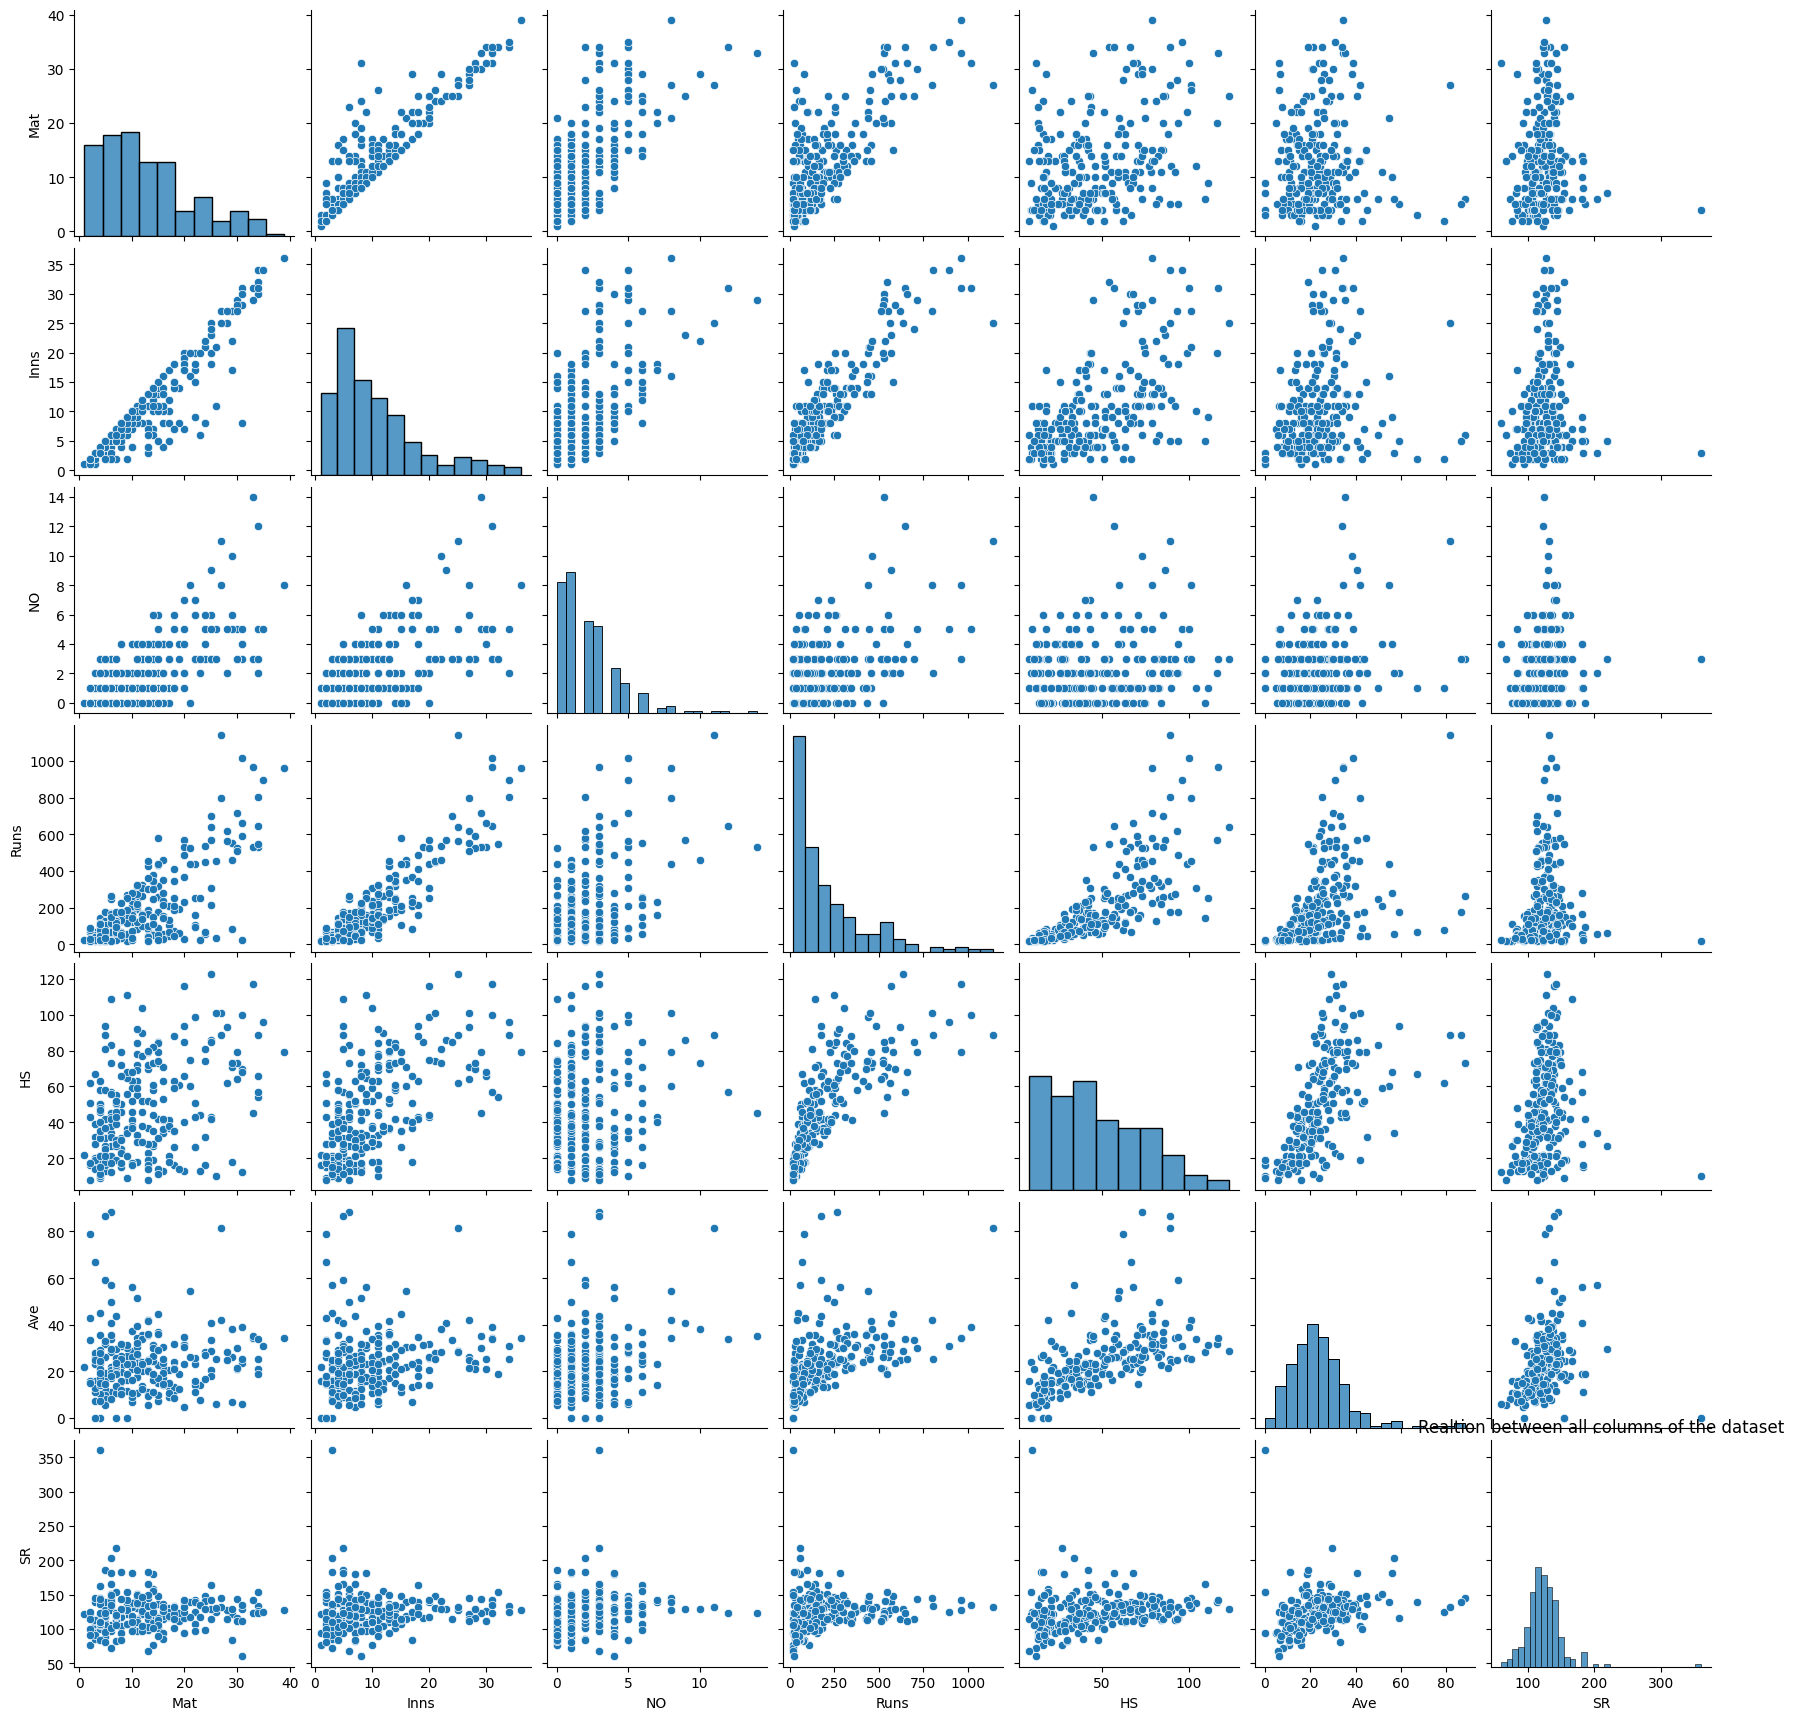

In [28]:
## Here , We plot the pair plot to check relations between the columns 

sns.pairplot(filter_df)
plt.title('Realtion between all columns of the dataset')
plt.show()

## Here , we concluded column NO(Not out) is not affcted the our target variable, so we exculded the cloumn ("NO") 
## from our dataset

In [29]:
## Here , We made the sub_dataset from filter_df for takeing important parameter of 'Ave' column from the dataset.

filter_df1 = filter_df[['Mat','Inns','Runs','Ave']]

In [30]:
## View the first five rows of the sub_dataset(filter_df1)
filter_df1.head()

,Mat,Inns,Runs,Ave
0,22,17,254,23.09
1,11,11,85,10.62
2,11,11,239,26.55
3,13,8,81,20.25
4,26,11,36,6.00


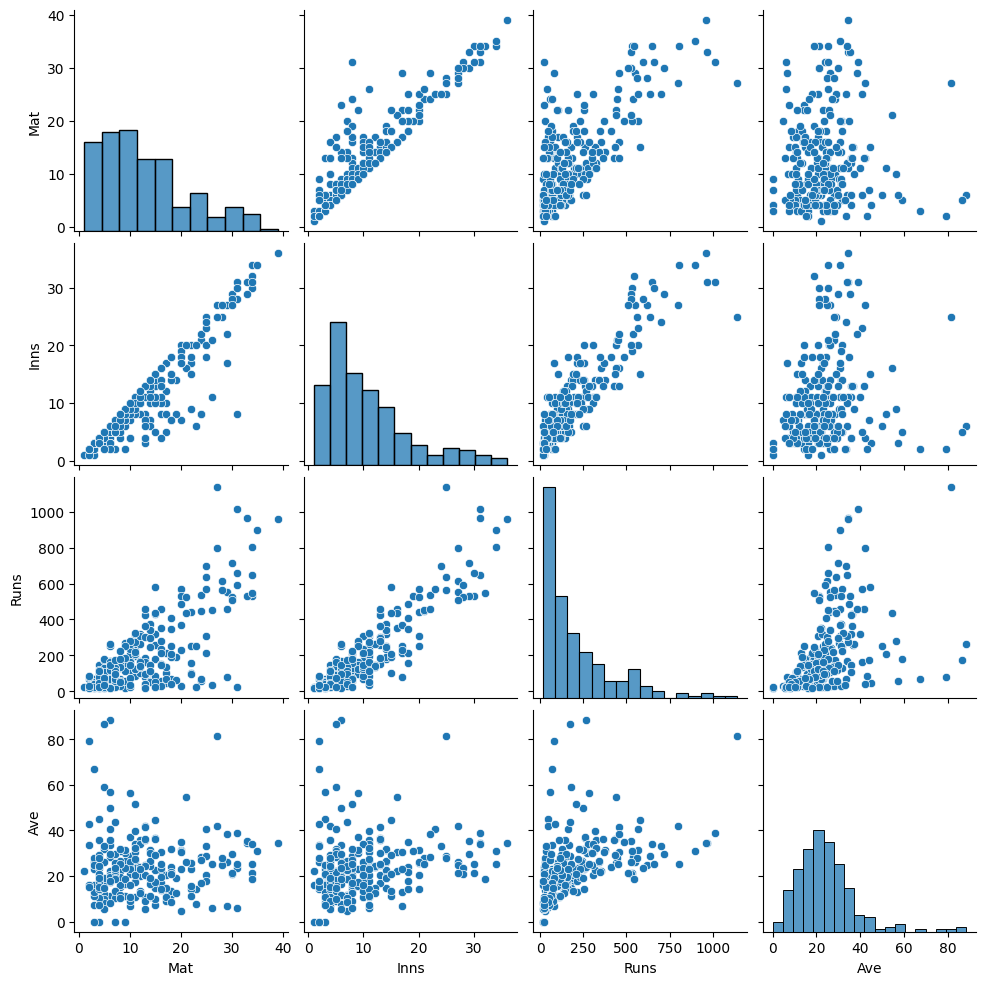

In [31]:
## Check the relation between the columns from filter_df1(subdataset)
sns.pairplot(filter_df1)
plt.show()

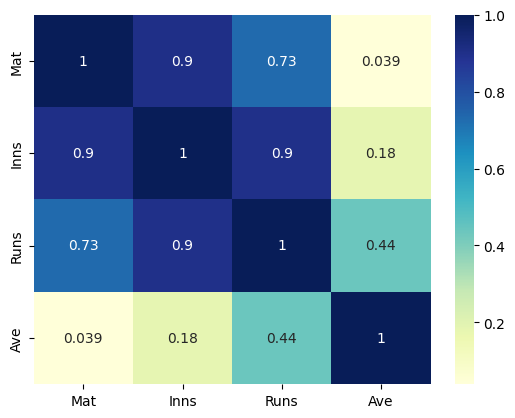

In [33]:
sns.heatmap(filter_df1.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [34]:
## Here , we select the specific columns 

subfilter_df1 = filter_df[['Mat','Inns','Ave']]

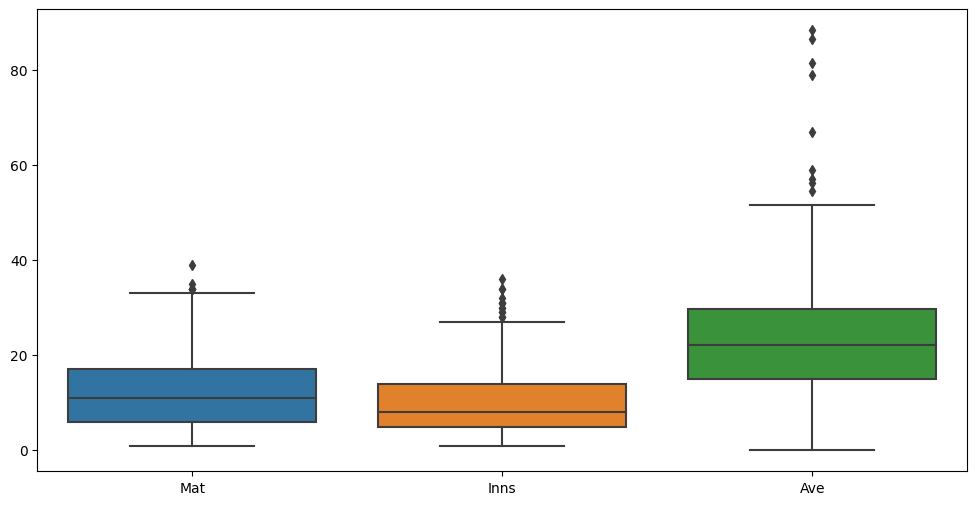

In [35]:
## Here,We plot the box-plot to check the outlier from the specific columns. 

plt.figure(figsize=(12,6))
sns.boxplot(subfilter_df1)
plt.show()

In [37]:
## Here , We made the sub_dataset from filter_df for takeing important parameter of 'SR' column from the dataset.

filter_df2 = filter_df[['Mat','Inns','Runs','HS','SR']]

In [38]:
## View the first-five rows of the filter_df2

filter_df2.head()

,Mat,Inns,Runs,HS,SR
0,22,17,254,51,124.50
1,11,11,85,18,96.59
2,11,11,239,55,114.90
3,13,8,81,23,144.64
4,26,11,36,10,124.13


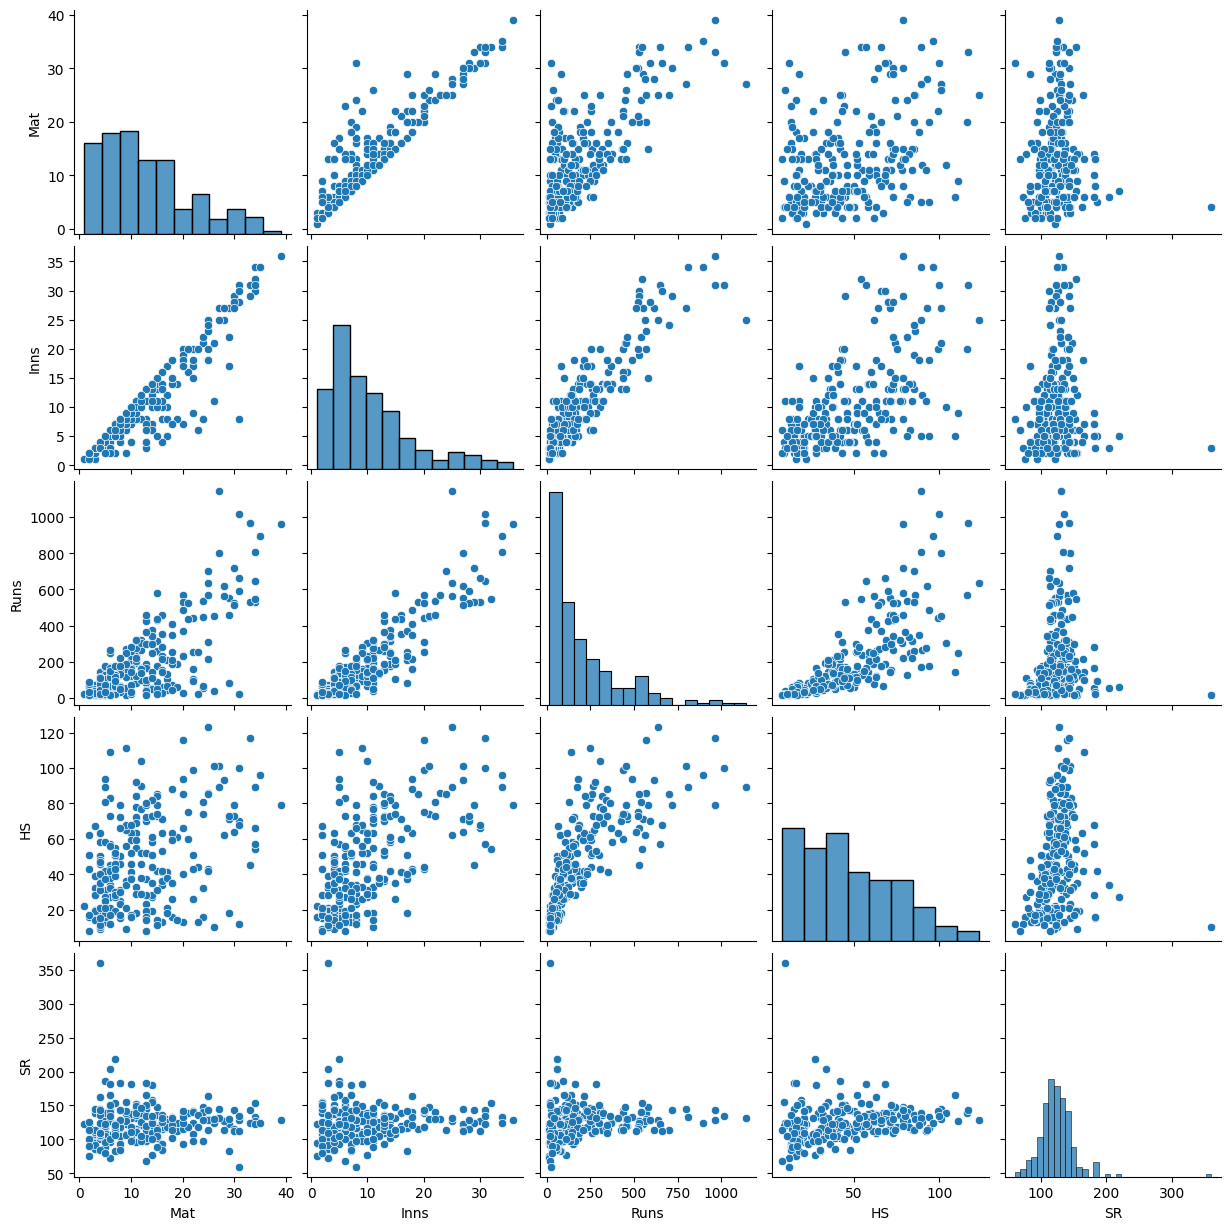

In [40]:
## Here , we plot the pairplot to check the realtion between the columns

sns.pairplot(filter_df2)
plt.show()

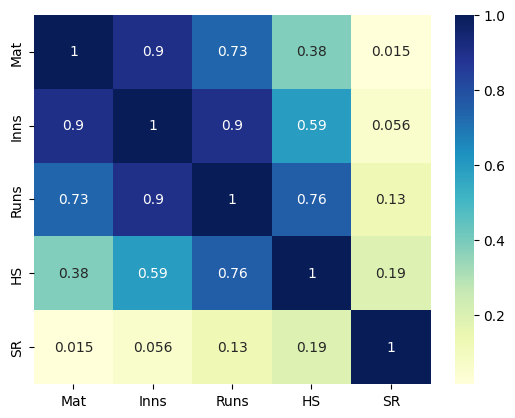

In [41]:
## Here , we check the correlation between the columns 

sns.heatmap(filter_df2.corr(),cmap = 'YlGnBu',annot=True)
plt.show()

In [42]:
## Here , we select specific columns of the filter_df2 dataset

subfilter_df2 = filter_df[['Runs','HS','SR']]

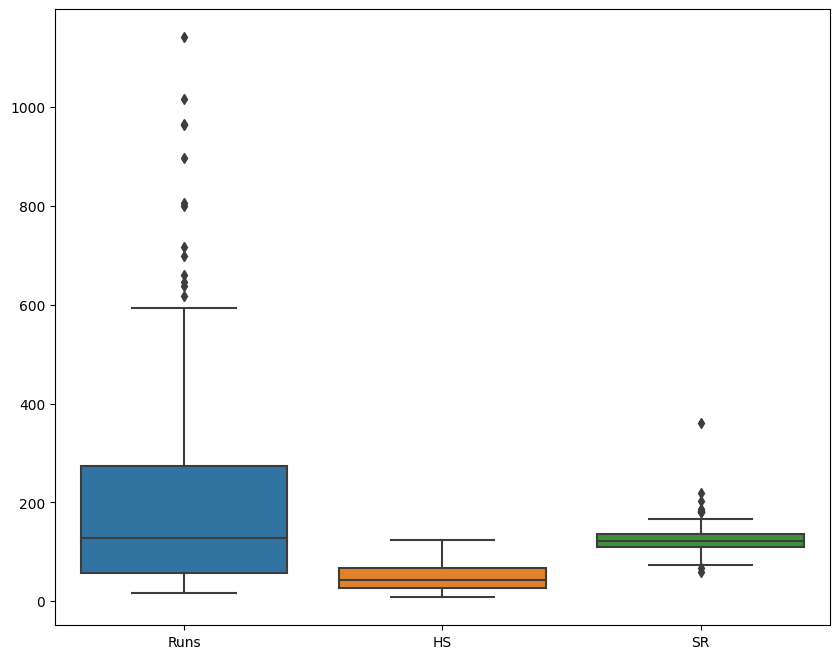

In [43]:
## Here,We plot the box-plot to check the outlier in the specific columns of the dataset.

plt.figure(figsize=(10,8))
sns.boxplot(subfilter_df2)
plt.show()

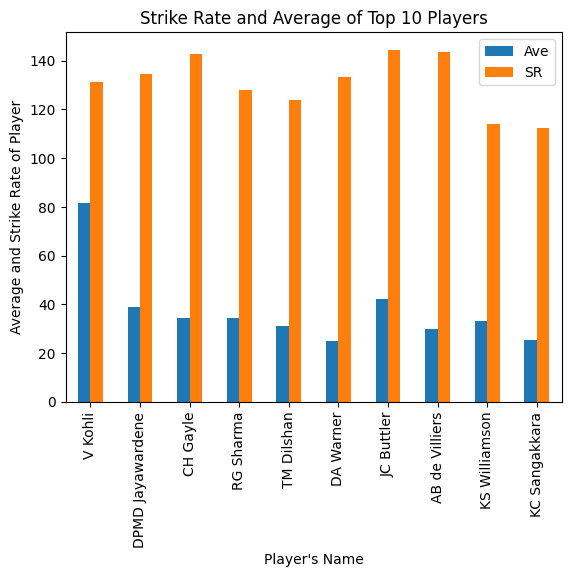

In [44]:
## Here , we plot(bar) top ten player who has  highest Runs in the entire data with  'Ave' and 'SR' 

filter_df.sort_values(by="Runs",ascending=False).head(10).plot(kind="bar",x="Player",y=["Ave","SR"])
plt.xlabel("Player's Name")
plt.ylabel("Average and Strike Rate of Player")
plt.title("Strike Rate and Average of Top 10 Players")
plt.show()

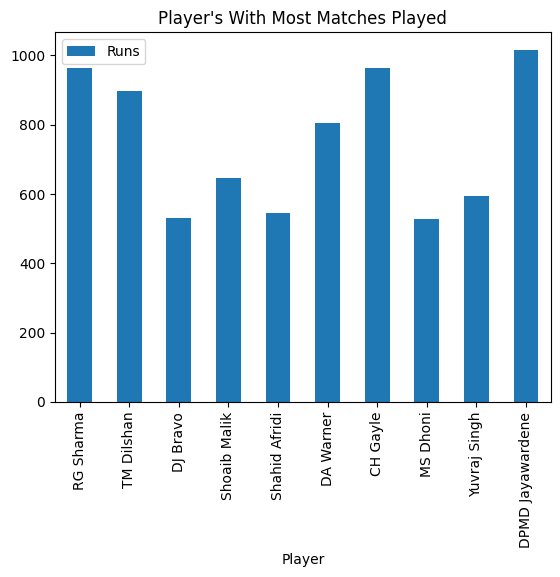

In [45]:
## Here , we plot(bar) top ten player who play highest matches in the dataset

filter_df.sort_values(by="Mat",ascending=False).head(10).plot(kind='bar',x="Player",y="Runs")
plt.title("Player's With Most Matches Played")
plt.show()

In [46]:
## Here , we check the player who has highest Ave value in the dataset.

filter_df[filter_df["Ave"]==filter_df["Ave"].max()]

,Player,Mat,Inns,NO,Runs,HS,Ave,SR
41,ML Hayden,6,6,3,265,73,88.33,144.8


In [47]:
# Sort the DataFrame 'filter_df' by the 'Inns' (innings) column in descending order.
# This code rearranges the rows so that players with the highest number of innings played appear first.
# Then, select the top 10 players with the most innings played.
top_10_players = filter_df.sort_values(by="Inns", ascending=False).head(10)


,Player,Mat,Inns,NO,Runs,HS,Ave,SR
160,RG Sharma,39,36,8,963,79,34.39,127.88
57,DA Warner,34,34,2,806,89,25.18,133.22
204,TM Dilshan,35,34,5,897,96,30.93,124.06
188,Shahid Afridi,34,32,3,546,54,18.82,154.23
207,DPMD Jayawardene,31,31,5,1016,100,39.07,134.74
192,Shoaib Malik,34,31,12,646,57,34.00,123.28
96,CH Gayle,33,31,3,965,117,34.46,142.75
90,DJ Bravo,34,30,5,530,66,21.20,126.79
221,KC Sangakkara,31,30,4,661,68,25.42,112.22
66,AB de Villiers,30,29,5,717,79,29.87,143.40


<Axes: xlabel='Player'>

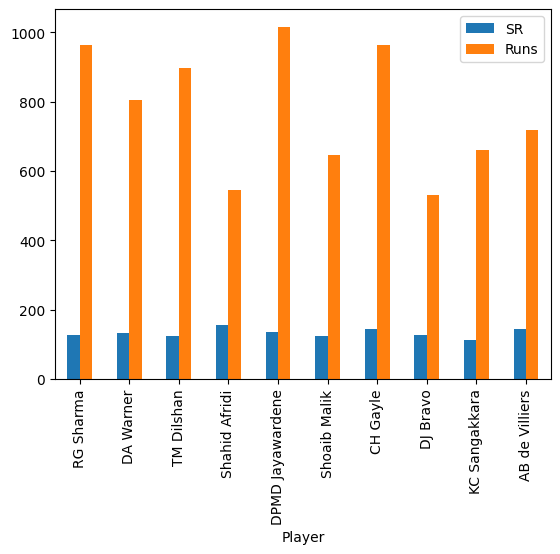

In [48]:
# Sort the DataFrame 'filter_df' by the 'Inns' (innings) column in descending order to find the top 10 players
# with the highest number of innings played.
# Then, create a bar plot to visualize the strike rate (SR) and runs scored (Runs) for these top 10 players.
# X-axis: Player names, Y-axis: SR and Runs values.
filter_df.sort_values(by="Inns", ascending=False).head(10).plot(kind='bar', x='Player', y=['SR', 'Runs'])

# Display the bar plot.
plt.show()

In [49]:
# Filter the DataFrame 'filter_df' to select players who have a batting average (Ave) greater than 55
# and a strike rate (SR) greater than 160.
filtered_players = filter_df[(filter_df["Ave"] > 55) & (filter_df["SR"] > 160)]

,Player,Mat,Inns,NO,Runs,HS,Ave,SR
89,CR Brathwaite,6,3,2,57,34,57.0,203.57
164,SA Yadav,10,9,4,281,68,56.2,181.29


In [52]:
# Define the 'player_cate' categories as 'Moderate', 'Good', and 'Best'.
player_cate = ['Moderate', 'Good', 'Best']

# Define the bin edges to categorize 'Ave' (batting average) values.
# Values less than or equal to 20 fall into the 'Moderate' category.
# Values greater than 20 and less than or equal to 40 fall into the 'Good' category.
# Values greater than 40 fall into the 'Best' category.
bins = [0, 20, 40, 90]

# Use the 'pd.cut' function to categorize 'Ave' values into the specified bins and assign labels.
cats = pd.cut(filter_df['Ave'], bins, labels=player_cate)

# Add a new column 'player_cate' to the DataFrame, containing the assigned categories.
filter_df['player_cate'] = cats

C:\Users\Jaiku\AppData\Local\Temp\ipykernel_16216\1961410537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['player_cate'] = cats


In [53]:
filter_df['player_cate'].value_counts()

Good        117
Moderate     89
Best         20
Name: player_cate, dtype: int64

C:\Users\Jaiku\AppData\Local\Temp\ipykernel_16216\2389768956.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = filter_df.groupby(['player_cate']).sum().plot(


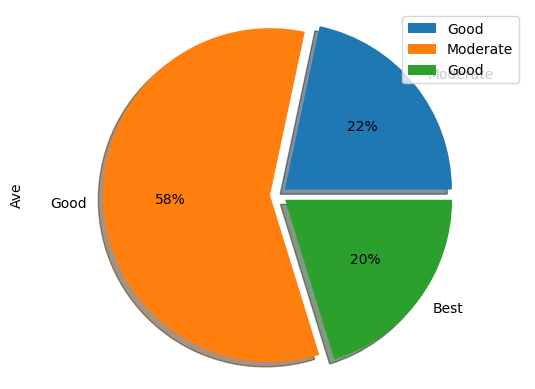

In [54]:
# Define the 'explode' parameter to create some separation between pie chart slices.
explode = [0.05, 0.05, 0.05]

# Group the DataFrame by 'player_cate', calculate the sum of 'Ave' for each category, and create a pie chart.
ax = filter_df.groupby(['player_cate']).sum().plot(
    kind='pie', y='Ave', explode=explode, autopct='%1.0f%%', shadow=True, legend=False)

# Add a legend to the pie chart indicating the categories.
plt.legend(labels=filter_df['player_cate'], loc="best")

# Ensure that the pie chart is drawn as a circle by setting an equal aspect ratio.
plt.axis('equal')

# Display the pie chart.
plt.show()


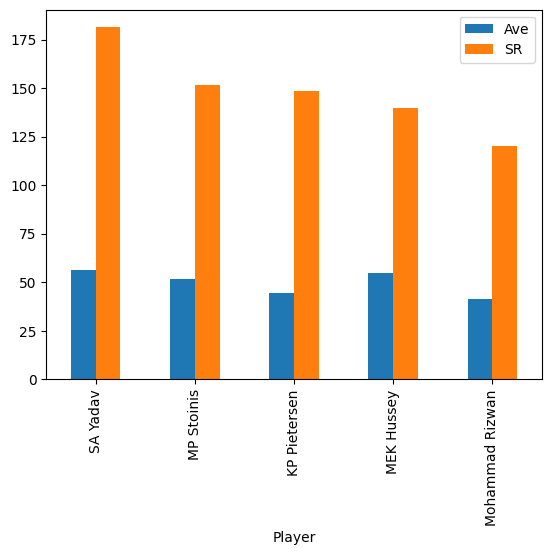

In [55]:
# Filter the DataFrame to include players with between 8 and 20 innings and an average (Ave) greater than 40.
# Then, sort the filtered DataFrame by strike rate (SR) in descending order.
filtered_players = filter_df[(filter_df['Inns'].between(8, 20)) & (filter_df['Ave'] > 40)].sort_values(by='SR', ascending=False)

# Create a bar plot to visualize the batting average (Ave) and strike rate (SR) of the filtered players.
# X-axis: Player names, Y-axis: Ave and SR values.
filtered_players.plot(kind='bar', x='Player', y=['Ave', 'SR'])

# Display the plot.
plt.show()

# Hypothesis Testing

In [56]:
# Separate data into two groups

good_strike_rate = data[data['SR'] >= 110]    # players with good strike rates          
lower_strike_rate = data[data['SR'] < 110]    # players with lower strike rates

In [57]:
print(good_strike_rate)

             Player       Span  Mat  Inns  NO  Runs   HS    Ave      SR  100  \
0            MM Ali  2014-2022   22    17   6   254   51  23.09  124.50    0   
4         RS Bopara  2009-2014   11    11   2   239   55  26.55  114.90    0   
5        TT Bresnan  2010-2014   13     8   4    81   23  20.25  144.64    0   
7         SCJ Broad  2007-2014   26    11   5    36   10   6.00  124.13    0   
9        JC Buttler  2012-2022   27    27   8   799  101  42.05  144.48    1   
..              ...        ...  ...   ...  ..   ...  ...    ...     ...  ...   
39    KC Sangakkara  2007-2014   31    30   4   661   68  25.42  112.22    0   
40  SMSM Senanayake  2014-2014    6     2   1    18   17  18.00  150.00    0   
41       MD Shanaka  2016-2022   18    15   5   209   35  20.90  114.20    0   
43  TAM Siriwardana  2016-2016    4     3   0    22   15   7.33  110.00    0   
44      WU Tharanga  2007-2007    5     5   0    74   37  14.80  123.33    0   

    50  0  
0    1  2  
4    1  0  
5  

In [58]:
print(lower_strike_rate)

               Player       Span  Mat  Inns  NO  Runs  HS    Ave     SR  100  \
1         JM Anderson  2007-2009    9     2   1     0   0   0.00   0.00    0   
2         JM Bairstow  2012-2021   11    11   3    85  18  10.62  96.59    0   
3         SW Billings  2021-2021    1     0   0     0   0   0.00   0.00    0   
6           DR Briggs  2012-2012    1     0   0     0   0   0.00   0.00    0   
8            HC Brook  2022-2022    6     5   0    56  20  11.20  96.55    0   
..                ...        ...  ...   ...  ..   ...  ..    ...    ...  ...   
48            I Udana  2009-2009    5     1   0     1   1   1.00  20.00    0   
49         WPUJC Vaas  2007-2007    5     2   1    33  21  33.00  80.48    0   
50      JDF Vandersay  2016-2016    3     3   2     3   3   3.00  37.50    0   
51  UWMBCA Welegedara  2010-2010    2     1   1     2   2   0.00  66.66    0   
52         G Wijekoon  2007-2007    3     2   1     1   1   1.00  20.00    0   

    50  0  
1    0  1  
2    0  1  
3  

# Null Hypothesis (H0): There is no significant difference in batting average
# Alternative Hypothesis (H1): Players with good strike rates have a significantly different batting average compared to players with lower strike rates

# We'll use a two-sample t-test for this hypothesis test

In [59]:
import scipy.stats as stats

In [60]:
# Perfrom a two-sample t-test
t_statistic,p_value = stats.ttest_ind(good_strike_rate['Ave'],
                                      lower_strike_rate['Ave'])

# Define significance level (alpha)
alpha = 0.05


# Check if the p-value is less than alpha to decide whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: Players with good strike rates have a significantly different batting average.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in batting average.")

Reject the null hypothesis: Players with good strike rates have a significantly different batting average.


# using Mann-Whitney U test for Hypothesis Testing

In [61]:
# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(good_strike_rate['Ave'],
                                          lower_strike_rate['Ave'], alternative='two-sided')

# Define significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: Players with good strike rates have a significantly different batting average.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in batting average.")

Reject the null hypothesis: Players with good strike rates have a significantly different batting average.


 Conclusion: There is a statistically significant difference in batting average between players with good strike rates 
            and players with lower strike rates. 
            This suggests that a player's strike rate is associated with their batting average.